# dataset link
# https://www.kaggle.com/datasets/rwzhang/seeds-dataset

# packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


# import dataset & preprocessing

In [2]:
# Load dataset
csv_path = 'Data/seeds.csv'
data = pd.read_csv(csv_path)
print(f"Total Samples: {len(data)}")
print("Dataset Preview:")
print(data.head())


Total Samples: 210
Dataset Preview:
   ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1  


In [3]:
# Drop unnecessary columns
data = data.drop(columns=['ID', 'seedType'])

# Define numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Preprocessing Complete")
print(data.head())


Preprocessing Complete
       area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  0.440982   0.502066     0.570780        0.486486       0.486101   
1  0.405099   0.446281     0.662432        0.368806       0.501069   
2  0.349386   0.347107     0.879310        0.220721       0.503920   
3  0.306893   0.316116     0.793103        0.239302       0.533856   
4  0.524079   0.533058     0.864791        0.427365       0.664291   

   asymmetryCoefficient  lengthOfKernelGroove  
0              0.189302              0.345150  
1              0.032883              0.215165  
2              0.251453              0.150665  
3              0.194243              0.140817  
4              0.076701              0.322994  


In [4]:
# PCA for dimensionality reduction (using 2 components)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[numerical_columns])


# Apply K-means

C:\Users\20112\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means Silhouette Score: 0.50


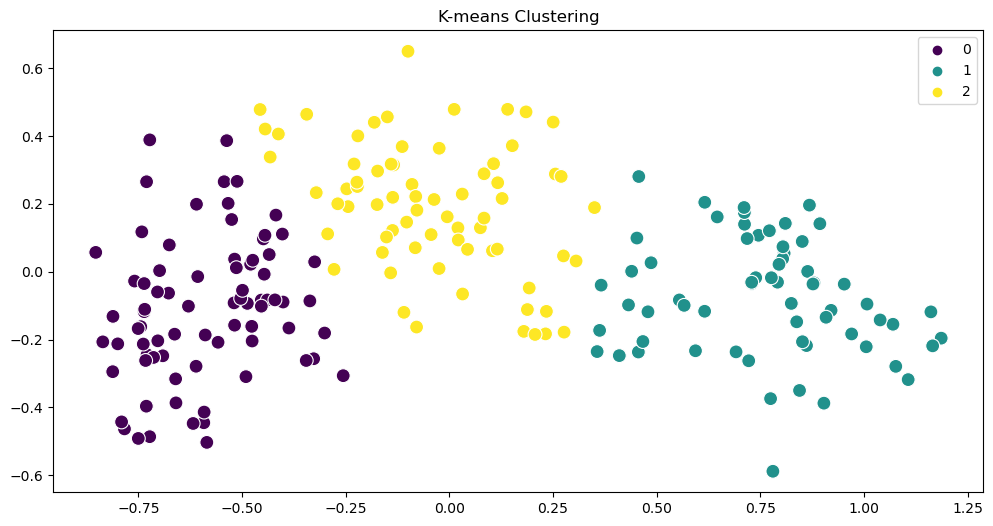

In [5]:
# K-means Clustering with n_clusters=3 and enhanced parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=30, init='k-means++', max_iter=300)
kmeans_labels = kmeans.fit_predict(data_pca)

# Evaluate K-means
silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)

print(f"K-means Silhouette Score: {silhouette_kmeans:.2f}")

# Visualize K-means Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-means Clustering')
plt.show()


# Agglomerative Clustering

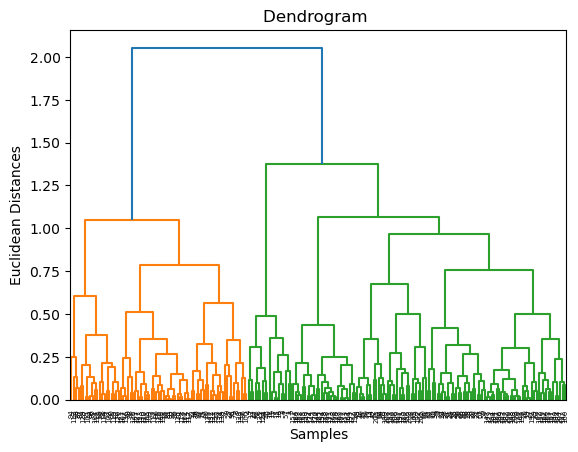

In [6]:
# Plot Dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_pca, method='complete'))
plt.title('Dendrogram ')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()


Agglomerative Clustering Silhouette Score: 0.47


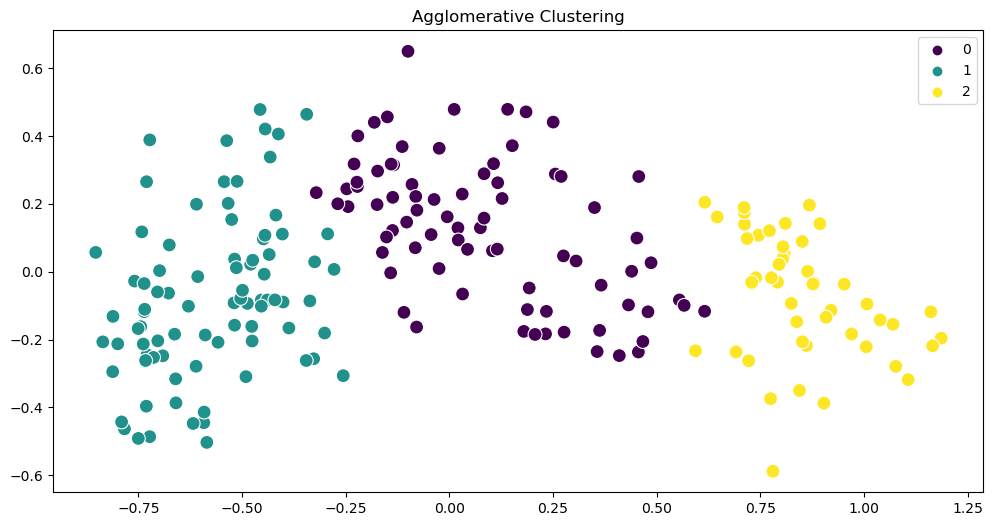

In [7]:
# Agglomerative Clustering with n_clusters=3 and linkage='complete'
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_pca)

# Assign cluster labels to the dataframe
data['agg_cluster'] = agg_labels

# Evaluate Agglomerative Clustering
silhouette_agg = silhouette_score(data_pca, agg_labels)

print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.2f}")

# Visualize Agglomerative Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=agg_labels, palette='viridis', s=100)
plt.title('Agglomerative Clustering')
plt.show()


# Compare Clustering Performance

In [8]:
# Compare Silhouette Scores
print("Silhouette Scores:")
print(f"K-means: {silhouette_kmeans:.2f}")
print(f"Agglomerative Clustering: {silhouette_agg:.2f}")

# Suggest best model based on Silhouette Score
best_model = max((silhouette_kmeans, 'K-means'), (silhouette_agg, 'Agglomerative Clustering'))
print(f"\nBest Model: {best_model[1]} with Silhouette Score: {best_model[0]:.2f}")


Silhouette Scores:
K-means: 0.50
Agglomerative Clustering: 0.47

Best Model: K-means with Silhouette Score: 0.50
